In [26]:
import albumentations as alb
import cv2
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
augmentor = alb.Compose(
    [
        alb.RandomCrop(width=450, height=450),
        alb.HorizontalFlip(p=0.5),
        alb.RandomBrightnessContrast(p=0.2),
        alb.RandomGamma(p=0.2),
        alb.RGBShift(p=0.2),
        alb.VerticalFlip(p=0.5),
    ],
    bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels'])
)

In [7]:
img = cv2.imread(os.path.join('split_data','train', 'images', 'e4f03449-0655-11f0-aab8-78af08054596.jpg'))

In [8]:
img

array([[[ 65,  69,  64],
        [ 62,  66,  61],
        [ 62,  64,  64],
        ...,
        [125, 119, 130],
        [128, 119, 132],
        [130, 121, 134]],

       [[ 64,  67,  65],
        [ 62,  65,  63],
        [ 63,  65,  65],
        ...,
        [127, 121, 132],
        [129, 120, 133],
        [129, 120, 133]],

       [[ 65,  64,  66],
        [ 64,  63,  65],
        [ 66,  65,  69],
        ...,
        [127, 120, 133],
        [129, 119, 135],
        [129, 119, 135]],

       ...,

       [[ 33,  27,  28],
        [ 30,  26,  25],
        [ 26,  25,  21],
        ...,
        [ 40,  35,  36],
        [ 39,  34,  35],
        [ 36,  31,  32]],

       [[ 33,  28,  29],
        [ 31,  27,  26],
        [ 27,  27,  21],
        ...,
        [ 44,  37,  40],
        [ 41,  35,  36],
        [ 42,  36,  37]],

       [[ 33,  28,  29],
        [ 33,  29,  28],
        [ 29,  29,  23],
        ...,
        [ 41,  32,  35],
        [ 39,  31,  32],
        [ 49,  41,  42]]

In [11]:
with open(os.path.join('split_data','train','labels','e4f03449-0655-11f0-aab8-78af08054596.json'), 'r') as f:
    label = json.load(f)

In [13]:
shape = label['shapes']

In [14]:
shape

[{'label': 'Face',
  'points': [[296.06382978723406, 0.9042553191489604],
   [427.4468085106383, 117.92553191489364]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {},
  'mask': None}]

In [15]:
coords = [0,0,0,0]

In [16]:
coords[0] = shape[0]['points'][0][0]
coords[1] = shape[0]['points'][0][1]
coords[2] = shape[0]['points'][1][0]
coords[3] = shape[0]['points'][1][1]

In [17]:
coords

[296.06382978723406, 0.9042553191489604, 427.4468085106383, 117.92553191489364]

In [19]:
coords = list(np.divide(coords, [640,480,640,480]))

In [20]:
coords

[np.float64(0.4625997340425532),
 np.float64(0.0018838652482270008),
 np.float64(0.6678856382978723),
 np.float64(0.24567819148936174)]

In [22]:
augumented = augmentor(image = img, bboxes = [coords], class_labels = ['Face'])

In [23]:
augumented

{'image': array([[[ 67,  64,  66],
         [ 65,  64,  66],
         [ 65,  64,  68],
         ...,
         [119, 121, 122],
         [121, 120, 124],
         [117, 116, 120]],
 
        [[ 67,  64,  66],
         [ 65,  64,  66],
         [ 65,  64,  68],
         ...,
         [120, 122, 123],
         [123, 122, 126],
         [118, 117, 121]],
 
        [[ 69,  64,  66],
         [ 67,  64,  66],
         [ 67,  63,  68],
         ...,
         [120, 121, 125],
         [123, 121, 127],
         [121, 117, 123]],
 
        ...,
 
        [[ 22,  19,  28],
         [ 22,  19,  28],
         [ 21,  18,  27],
         ...,
         [ 47,  36,  38],
         [ 43,  36,  39],
         [ 40,  35,  37]],
 
        [[ 24,  21,  30],
         [ 23,  23,  29],
         [ 21,  21,  27],
         ...,
         [ 39,  26,  28],
         [ 38,  29,  32],
         [ 36,  29,  32]],
 
        [[ 22,  22,  28],
         [ 20,  23,  28],
         [ 19,  22,  27],
         ...,
         [ 36,  22,

In [24]:
augumented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [25]:
augumented['bboxes']

[[0.2756973859998915, 0.0, 0.5676596069335937, 0.19761228773328993]]

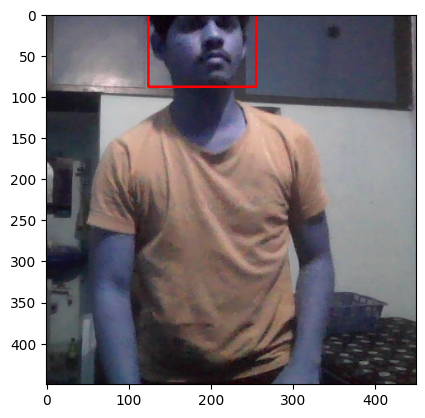

In [27]:
cv2.rectangle(augumented['image'],
              tuple(np.multiply(augumented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augumented['bboxes'][0][2:], [450,450]).astype(int)),
              (255,0,0), 2
              )
plt.imshow(augumented['image'])